# Munging and Pre-Processing

In [1]:
# basic utilities & packages
import numpy as np
import pandas as pd

# model building packages
from sklearn import preprocessing
# from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.cross_validation import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn import tree 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from scipy import stats
from scipy.stats import uniform as sp_rand
from sklearn.linear_model import SGDClassifier

from sklearn.lda import LDA
from sklearn.qda import QDA

# system utilities
import time
from operator import itemgetter
import os
os.getcwd()

# plotting utilities
import matplotlib.pyplot as plt

# environment config
%matplotlib inline
%pwd

//anaconda/lib/python3.5/site-packages/sklearn/lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)
//anaconda/lib/python3.5/site-packages/sklearn/qda.py:4: DeprecationWarning: qda.QDA has been moved to discriminant_analysis.QuadraticDiscriminantAnalysis in 0.17 and will be removed in 0.19.
  "in 0.17 and will be removed in 0.19.", DeprecationWarning)


'/Users/darshanabenhur'

# Input the dataset

In [2]:
cd /Users/darshanabenhur/Downloads

/Users/darshanabenhur/Downloads


In [3]:
Test=pd.read_csv("Train.csv") 
Test
# I will be using this as my train and test set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [4]:
Test.shape

(891, 12)

In [5]:
Test.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [6]:
Test.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Cleaning the Data

In [13]:
numberList = list(Test.select_dtypes(include=['int64']).columns)
numberList

['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch']

In [14]:
objectList = list(Test.select_dtypes(include=['object']).columns)
objectList

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [15]:
df = Test.fillna(Test.median())
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,28,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


# Explore the Data

In [16]:
print(df['Sex'].unique())

['male' 'female']


In [17]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Survived
0    [[Axes(0.125,0.684722;0.336957x0.215278), Axes...
1    [[Axes(0.125,0.684722;0.336957x0.215278), Axes...
dtype: object

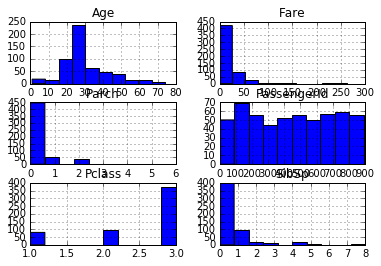

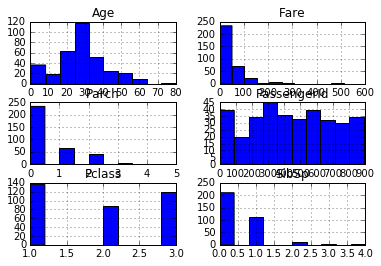

In [18]:
df.groupby('Survived').hist()

In [19]:
df.std()

PassengerId    257.353842
Survived         0.486592
Pclass           0.836071
Age             13.019697
SibSp            1.102743
Parch            0.806057
Fare            49.693429
dtype: float64

# Z Score the "Fare" feature

In [20]:
from scipy import stats

In [21]:
df['Fare-ZScored'] = stats.zscore(df['Fare'])

In [22]:
print(df['Fare-ZScored'].std())

1.0005616400330462


In [23]:
df_zscore_compare = df[['Fare-ZScored', 'Fare']]

In [24]:
df_zscore_compare.head()

,Fare-ZScored,Fare
0,-0.502445,7.2500
1,0.786845,71.2833
2,-0.488854,7.9250
3,0.420730,53.1000
4,-0.486337,8.0500


# Converting Categorical Variables

In [25]:
df.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
Fare-ZScored    float64
dtype: object

In [26]:
df_new_dt = pd.get_dummies(df['Embarked'])
df_new_dt = pd.get_dummies(df['Sex'])

In [27]:
df_new = pd.concat([df_new_dt, df], axis=1)

In [28]:
df_new.head(5)

,female,male,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare-ZScored
0,0,1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,-0.502445
1,1,0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,0.786845
2,1,0,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,-0.488854
3,1,0,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,0.420730
4,0,1,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,-0.486337


In [29]:
del df_new['PassengerId']
del df_new['Name']
del df_new['Ticket']
del df_new['Cabin']
del df_new['Embarked']

In [30]:
df_new

,female,male,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Fare-ZScored
0,0,1,0,3,male,22,1,0,7.2500,-0.502445
1,1,0,1,1,female,38,1,0,71.2833,0.786845
2,1,0,1,3,female,26,0,0,7.9250,-0.488854
3,1,0,1,1,female,35,1,0,53.1000,0.420730
4,0,1,0,3,male,35,0,0,8.0500,-0.486337
5,0,1,0,3,male,28,0,0,8.4583,-0.478116
6,0,1,0,1,male,54,0,0,51.8625,0.395814
7,0,1,0,3,male,2,3,1,21.0750,-0.224083
8,1,0,1,3,female,27,0,2,11.1333,-0.424256
9,1,0,1,2,female,14,1,0,30.0708,-0.042956


In [31]:
#Another important script I use.
# designate target variable name
targetName = 'Survived'

# move target variable into first column
targetSeries = df_new[targetName]

In [32]:
del df_new[targetName]

In [33]:
targetName

'Survived'

In [34]:
df_new.insert(0, targetName, targetSeries)
expected=targetName

# Split Data

In [35]:
df=df_new

In [36]:
# split dataset into testing and training, 70% training set.
features_train, features_test, target_train, target_test = train_test_split(
    df.ix[:,1:].values, df.ix[:,0].values, test_size=0.30, random_state=0)

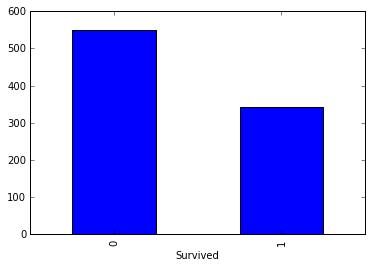

In [37]:
# Let's graph our target variables and see what the split looks like

gb = df.groupby(targetName)
targetEDA=gb[targetName].aggregate(len)
plt.figure()
targetEDA.plot(kind='bar', grid=False)
plt.axhline(0, color='k')

# 1 KNN

In [38]:
df.head(5)
del df['Sex']

In [45]:
df.head(1000)

,Survived,female,male,Pclass,Age,SibSp,Parch,Fare,Fare-ZScored
0,0,0,1,3,22.00,1,0,7.2500,-0.502445
1,1,1,0,1,38.00,1,0,71.2833,0.786845
2,1,1,0,3,26.00,0,0,7.9250,-0.488854
3,1,1,0,1,35.00,1,0,53.1000,0.420730
4,0,0,1,3,35.00,0,0,8.0500,-0.486337
5,0,0,1,3,28.00,0,0,8.4583,-0.478116
6,0,0,1,1,54.00,0,0,51.8625,0.395814
7,0,0,1,3,2.00,3,1,21.0750,-0.224083
8,1,1,0,3,27.00,0,2,11.1333,-0.424256
9,1,1,0,2,14.00,1,0,30.0708,-0.042956


In [40]:
pd.set_option('display.max_rows', 500)

In [41]:
print(features_train)

[[0.0 1.0 1 ..., 0 26.55 -0.11384570873513637]
 [1.0 0.0 1 ..., 0 76.7292 0.8964967865378598]
 [0.0 1.0 3 ..., 2 46.9 0.2958951755118318]
 ..., 
 [0.0 1.0 3 ..., 0 7.7333 -0.49271407711891657]
 [1.0 0.0 3 ..., 0 17.4 -0.29807809649237277]
 [0.0 1.0 2 ..., 1 39.0 0.13683114673782454]]


In [47]:
df.dtypes
df_new = pd.concat([df.'survived'],df.'female',df.'male',df.'Pclass',df.'Age',df.'SibSp',df.'Parch',df.'Fare',df.'Fare-ZScored'], axis=1)

SyntaxError: invalid syntax (<ipython-input-47-f3fde33debc4>, line 2)

In [43]:
#Try KNN
clf_KNN = KNeighborsClassifier()
clf_KNN.fit(features_train, target_train) 
predicted_KNN = clf_KNN.predict(features_test)
print(clf_KNN)

# summarize the fit of the model
# print(classification_report(expected, predicted_KNN, target_names=targetNameLabels))
# print(confusion_matrix(expected, predicted_KNN))
# print("KNN Accuracy Score", accuracy_score(expected, predicted_KNN))

ValueError: could not convert string to float: 'male'